In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import catboost as cb
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

X_train = pd.read_csv("train/X_train.csv").drop(columns="dt_iso")
y_train = pd.read_csv("train/y_train.csv")

X_val = pd.read_csv("validation/X_val.csv").drop(columns="dt_iso")
y_val = pd.read_csv("validation/y_val.csv")

X_test = pd.read_csv("test/X_test.csv").drop(columns="dt_iso")
y_test = pd.read_csv("test/y_test.csv")

Test Mean Squared Error: 4.273631976051777e+18


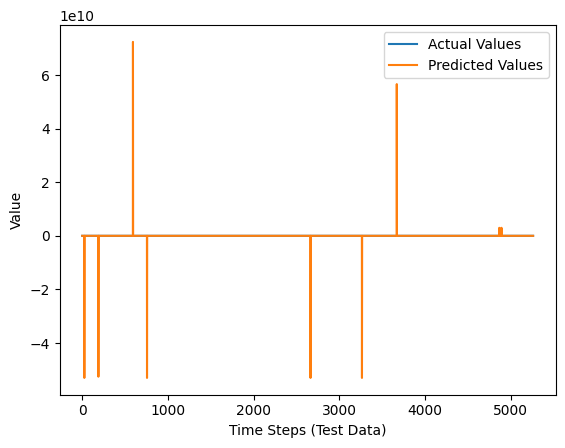

In [2]:
degrees = [1, 2, 3, 4]
validation_errors = []
best_degree=1

"""for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Train a linear regression model on the polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on the validation set and calculate error
    y_val_pred = model.predict(X_val_poly)
    val_mse = mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_mse)
    
    print(f"Degree: {degree}, Validation MSE: {val_mse}")

# Select the best polynomial degree based on the lowest validation error
best_degree = degrees[np.argmin(validation_errors)]
print(f"Best Polynomial Degree: {best_degree}")"""

# Combine training and validation sets
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Create polynomial features with the best degree
poly = PolynomialFeatures(degree=best_degree)
X_train_val_poly = poly.fit_transform(X_train_val)
X_test_poly = poly.transform(X_test)

# Train the model on the combined training and validation set
final_model = LinearRegression()
final_model.fit(X_train_val_poly, y_train_val)

# Predict on the test set
y_test_pred = final_model.predict(X_test_poly)

# Calculate the Mean Squared Error
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")

# Plot actual vs predicted values for the test set
plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_test_pred)), y_test_pred, label="Predicted Values")
plt.legend()
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()


/Users/villiarnar/Desktop/IT3212 - Datadrevet Programvare/IT3212/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.01408087920006502


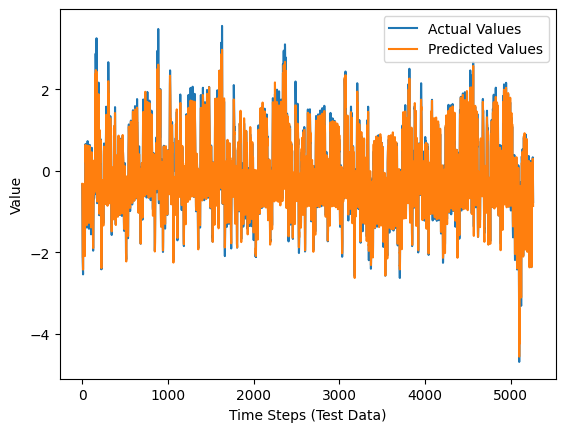

In [3]:
#neural network
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=2000, random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted values for the test set
plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values")
plt.legend()
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()

### Decision Tree

Mean Squared Error Catboost: 0.009801215712633747
Mean Squared Error LightGBM: 0.009767104840682663
Mean Squared Error XGBoost: 0.012024305106852618
Mean Squared Error Ensamble: 0.009476274460398868


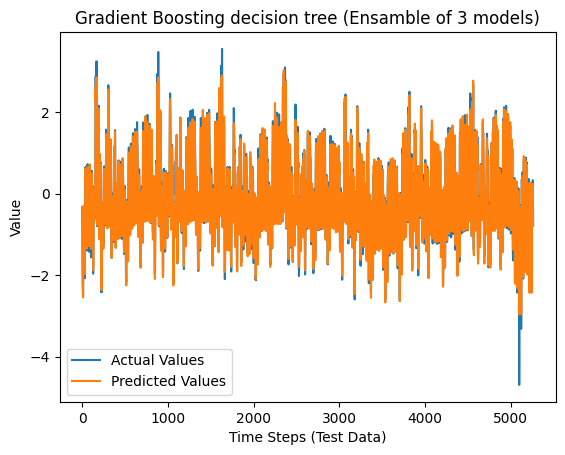

In [ ]:
"""
catboost_model = cb.CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val))

lightgbm_model = lgb.LGBMRegressor(verbose=-1, random_state=42)
lightgbm_model.fit(X_train, y_train, eval_set=(X_val, y_val))

xgboost_model = xgb.XGBRegressor(random_state=42)
xgboost_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

y_pred_catboost = catboost_model.predict(X_test)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
print(f"Mean Squared Error Catboost: {mse_catboost}")

y_pred_lightgbm = lightgbm_model.predict(X_test)
mse_lightgbm = mean_squared_error(y_test, y_pred_lightgbm)
print(f"Mean Squared Error LightGBM: {mse_lightgbm}")

y_pred_xgboost = xgboost_model.predict(X_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
print(f"Mean Squared Error XGBoost: {mse_xgboost}")

y_pres_ensamble = (y_pred_catboost + y_pred_lightgbm + y_pred_xgboost) / 3
mse_ensamble = mean_squared_error(y_test, y_pres_ensamble)
print(f"Mean Squared Error Ensamble: {mse_ensamble}")

plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values")
plt.legend()
plt.title("Gradient Boosting decision tree (Ensamble of 3 models)")
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()
"""

# Decision tree regressor


### Random forrest

/Users/villiarnar/Desktop/IT3212 - Datadrevet Programvare/IT3212/.venv/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error Random Forest: 0.009645484318638228


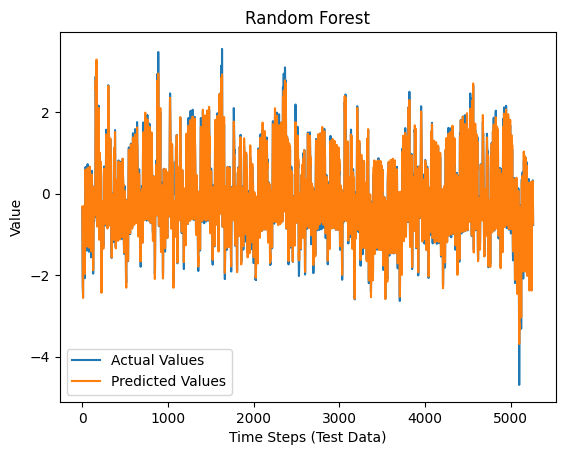

In [17]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train, )
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error Random Forest: {mse_rf}")

plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Predicted Values")
plt.legend()
plt.title("Random Forest")
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()